<a href="https://colab.research.google.com/github/kk-2006-hub/Hands-on-experience/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/income (2).csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [ ]:
data.shape

(22, 3)

In [ ]:
data=data.drop('Name',axis=1)

In [ ]:
data.shape

(22, 2)

In [ ]:
data.columns=['Age','Income($)']

In [ ]:
x=data[['Age','Income($)']]

In [ ]:
data.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
x

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653],
       [ 0.72533193,  1.51904783],
       [ 1.07222982,  1.63667914],
       [ 0.55188299,  1.68373166],
       [ 0.20498511,  1.54257409],
       [ 0.03153617,  0.93089133],
       [ 0.37843405,  1.09557515],
       [-1.5295043 , -1.06884077],
       [-1.35605536, -0.99826199],
       [-1.18260641, -0.92768321],
       [-1.00915747, -0.9629726 ],
       [-0.48881065, -0.88063069],
       [ 0.89878087, -0.59831557],
       [ 1.07222982, -0.64536809],
       [ 1.4191277 , -0.62184183],
       [ 0.72533193, -0.24542167],
       [ 1.07222982, -0.19836915],
       [ 0.72533193, -0.76299939]])

In [ ]:
x=pd.DataFrame(x)

In [ ]:
x

,0,1
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [ ]:
x.columns=['Age','Income']

In [ ]:
x

,Age,Income
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


Text(0, 0.5, 'Income')

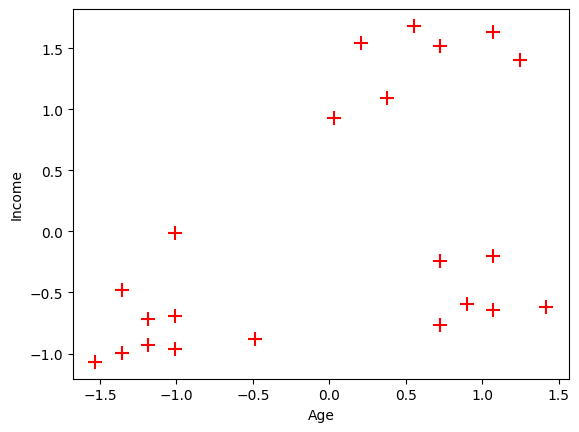

In [ ]:
plt.scatter(x['Age'],x['Income'],color='red',s=100,marker='+')
plt.xlabel('Age')
plt.ylabel('Income')

In [ ]:
sse=[]
from sklearn.cluster import KMeans
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,n_init=10)
  kmeans.fit(x)
  sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

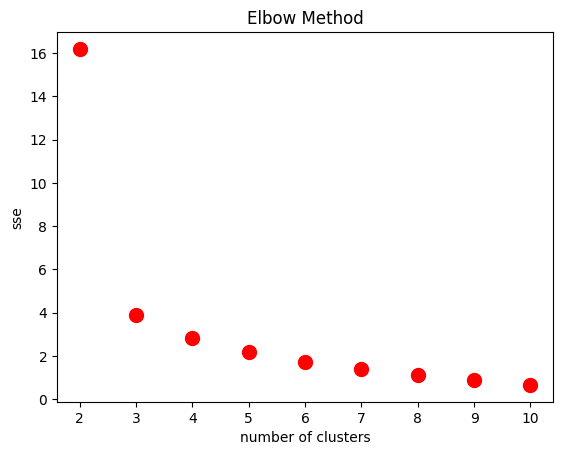

In [ ]:
plt.scatter(range(2,11),sse,marker='o',color='red',s=100)
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.title('Elbow Method')


In [ ]:
km=KMeans(n_clusters=3,n_init=10)
y=km.fit_predict(x)

In [ ]:
x['clusters']=y

In [ ]:
x

,Age,Income,clusters
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
4,1.245679,1.401417,0
5,0.725332,1.519048,0
6,1.072230,1.636679,0
7,0.551883,1.683732,0
8,0.204985,1.542574,0
9,0.031536,0.930891,0


In [ ]:
x.head()

,Age,Income,clusters
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
4,1.245679,1.401417,0


In [ ]:
x.shape

(22, 3)

In [ ]:
x1=x[x['clusters']==0]
x2=x[x['clusters']==1]
x3=x[x['clusters']==2]

In [ ]:
x1

,Age,Income,clusters
4,1.245679,1.401417,0
5,0.725332,1.519048,0
6,1.072230,1.636679,0
7,0.551883,1.683732,0
8,0.204985,1.542574,0
9,0.031536,0.930891,0
10,0.378434,1.095575,0


In [ ]:
x2

,Age,Income,clusters
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
11,-1.529504,-1.068841,1
12,-1.356055,-0.998262,1
13,-1.182606,-0.927683,1
14,-1.009157,-0.962973,1
15,-0.488811,-0.880631,1


In [ ]:
x3

,Age,Income,clusters
16,0.898781,-0.598316,2
17,1.072230,-0.645368,2
18,1.419128,-0.621842,2
19,0.725332,-0.245422,2
20,1.072230,-0.198369,2
21,0.725332,-0.762999,2


In [ ]:
centroids=km.cluster_centers_

In [ ]:
centroids

array([[ 0.60143983,  1.40141653],
       [-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261]])

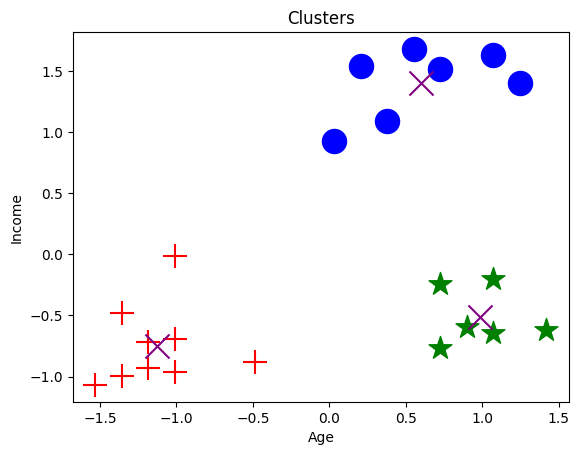

In [ ]:
plt.scatter(x1['Age'],x1['Income'],color='blue',s=300,marker='o')
plt.scatter(x2['Age'],x2['Income'],color='red',s=300,marker='+')
plt.scatter(x3['Age'],x3['Income'],color='green',s=300,marker='*')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters')
plt.scatter(centroids[:,0],centroids[:,1],color='purple',s=300,marker='x')

In [ ]:
new_point=[[30,55000]]
new_point_scaled=scaler.transform(new_point)
cluster_label=km.predict(new_point_scaled)
print(cluster_label)

[1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
